# Advanced Machine Learning - Applications

# 0. SVD (Application: Image Compression)

In [2]:
import numpy as np
import matplotlib.image as mpimg
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [3]:
img = mpimg.imread('Images/lena.png')
print img.shape

(512L, 512L, 3L)


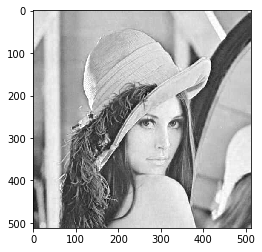

In [9]:
lum_img = img[:,:,0]
plt.imshow(lum_img,cmap='gray')

In [15]:
# Obtain SVD
U, S, Vt = np.linalg.svd(lum_img,full_matrices=False)        
print U.shape

(512L, 512L)


(512L, 512L)


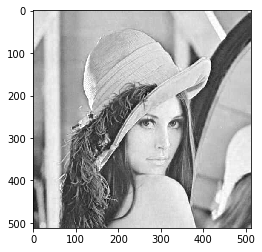

In [19]:
# Reconstruct
new_img = np.dot(U,np.dot(np.diag(S),Vt))

print new_img.shape
plt.imshow(new_img,cmap='gray')

In [24]:
# Descending order of singular values
# print S
print S.shape

(512L,)


In [25]:
S1 = np.diag(S)
n = 200 # Retaining top n singular values only
S1[n:,n:] = 0

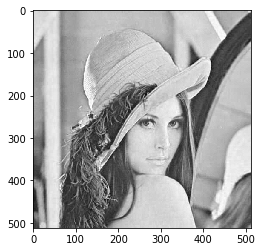

In [26]:
# Reconstruct using only top n singular values
img_c = np.dot(U,np.dot(S1,Vt))

plt.imshow(img_c,cmap='gray')

# 1. Matrix Factorization for Recommendation Systems

Source: https://beckernick.github.io/matrix-factorization-recommender/

- We study low-rank matrix factorization for recommendations and use it on a **dataset of 1 million movie ratings** (from 1 to 5) available from the [MovieLens](http://grouplens.org/datasets/movielens/) project. 


- The MovieLens datasets were created collected by GroupLens Research at the University of Minnesota.

## Matrix Factorization via Singular Value Decomposition

- Matrix factorization is the **breaking down of one matrix in a product of multiple matrices**. There are many different ways to factor matrices, but singular value decomposition is particularly useful for making recommendations.


- At a high level, SVD is an algorithm that decomposes a matrix $R$ into the best lower rank (i.e. smaller/simpler) approximation of the original matrix $R$. Mathematically, it decomposes $R$ into two unitary matrices and a diagonal matrix:

$$\begin{equation}
R = U\Sigma V^{T}
\end{equation}$$

   where $R$ is users's ratings matrix, $U$ is the user "features" matrix, $\Sigma$ is the diagonal matrix of singular values (essentially weights), and $V^{T}$ is the movie "features" matrix. $U$ and $V^{T}$ are unitary matrices. 


- $U$ represents how much users "like" each feature and $V^{T}$ represents how relevant each feature is to each movie.


- To get the lower rank approximation, we take these matrices and keep only the top $k$ features, which we think of as the underlying tastes and preferences vectors.

In [29]:
import pandas as pd
import numpy as np

ratings_list = [i.strip().split("::") for i in open('Data/ratings.dat', 'r').readlines()]      
users_list = [i.strip().split("::") for i in open('Data/users.dat', 'r').readlines()]
movies_list = [i.strip().split("::") for i in open('Data/movies.dat', 'r').readlines()]

In [30]:
# Convert to numpy array
ratings = np.array(ratings_list)                      
users = np.array(users_list)
movies = np.array(movies_list)

In [31]:
# Make dataframes for processing

ratings_df = pd.DataFrame(ratings_list, columns = ['UserID', 'MovieID', 'Rating', 'Timestamp'], dtype = int)
movies_df = pd.DataFrame(movies_list, columns = ['MovieID', 'Title', 'Genres'])
movies_df['MovieID'] = movies_df['MovieID'].apply(pd.to_numeric)

In [32]:
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [33]:
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


These look good, but we want the format of our Ratings matrix to be **one row per user and one column per movie**. 

We'll `pivot` `ratings_df` to get that and call the new variable `R`.

In [34]:
R_df = ratings_df.pivot(index = 'UserID', columns = 'MovieID', values = 'Rating').fillna(0)    
R_df.head()

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
R_df.tail()

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
6036,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6040,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- Now, de-mean the data (normalize by each users mean) and convert it from a dataframe to a numpy array.

In [36]:
R = R_df.as_matrix()

user_ratings_mean = np.mean(R,axis=1)

# Make it zero-mean
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

- All set. With our ratings matrix properly formatted and normalized, we are ready to do the singular value decomposition

## Applying Singular Value Decomposition

Scipy and Numpy both have functions to do the singular value decomposition. Here, we will use the Scipy function `svds` because it let's us choose how many latent factors we want to use to approximate the original ratings matrix (instead of having to truncate it after).

In [37]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_demeaned, k = 50)

- The $\Sigma$ returned is just the values instead of a diagonal matrix. 
- This is useful, but since we are going to leverage matrix multiplication to get predictions, we'll convert it to the diagonal matrix form.

In [38]:
print sigma
sigma = np.diag(sigma)
print sigma

[  147.18581225   147.62154312   148.58855276   150.03171353   151.79983807
   153.96248652   154.29956787   154.54519202   156.1600638    157.59909505
   158.55444246   159.49830789   161.17474208   161.91263179   164.2500819
   166.36342107   166.65755956   167.57534795   169.76284423   171.74044056
   176.69147709   179.09436104   181.81118789   184.17680849   186.29341046
   192.15335604   192.56979125   199.83346621   201.19198515   209.67692339
   212.55518526   215.46630906   221.6502159    231.38108343   239.08619469
   244.8772772    252.13622776   256.26466285   275.38648118   287.89180228
   315.0835415    335.08085421   345.17197178   362.26793969   415.93557804
   434.97695433   497.2191638    574.46932602   670.41536276  1544.10679346]
[[  147.18581225     0.             0.         ...,     0.             0.
      0.        ]
 [    0.           147.62154312     0.         ...,     0.             0.
      0.        ]
 [    0.             0.           148.58855276 ...,     

## Making Predictions from the Decomposed Matrices

- We now have everything we need to make movie ratings predictions for every user. 


- We can do it all at once by following the math and matrix multiply $U$, $\Sigma$, and $V^{T}$ back to get the rank $k=50$ approximation of $R$.


- We also need to add the user means back to get the actual star ratings prediction.

In [39]:
all_user_predicted_ratings = np.dot(np.dot(U,sigma),Vt) + user_ratings_mean.reshape(-1, 1)   
all_user_predicted_ratings[:10,:3] 

array([[ 4.28886061,  0.14305516, -0.1950795 ],
       [ 0.74471587,  0.16965927,  0.33541808],
       [ 1.81882382,  0.45613623,  0.09097801],
       [ 0.40805697, -0.07296018,  0.03964241],
       [ 1.57427245,  0.02123904, -0.05129994],
       [ 2.08095434,  0.20089638,  0.25742654],
       [ 0.05056107,  0.14555134,  0.07143897],
       [ 0.81875979,  0.15726791,  0.69156809],
       [ 3.6672577 ,  0.12555919,  0.02581049],
       [ 4.51691241,  2.9681962 ,  1.25410159]])

**Note**:

- To put this kind of system into production, we'd want to create a training and validation set and optimize the number of latent features ($k$) by minimizing the Root Mean Square Error. Intuitively, the Root Mean Square Error will decrease on the training set as $k$ increases (because we are approximating the original ratings matrix with a higher rank matrix).


- We could **create a training and validation set and optimize $k$ by minimizing RMSE**


- We now will see some movie recommendations.

## Making Movie Recommendations
- With the predictions matrix for every user, we can build a function to recommend movies for any user. 


- All we need to do is **return the movies with the highest predicted rating that the specified user hasn't already rated**. 


- Though we have not actually used any explicit movie content features (such as genre or title), we'll merge in that information to get a more complete picture of the recommendations.


- We'll also return the list of movies the user has already rated, for the sake of comparison.

In [40]:
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = R_df.columns)
preds_df.head()

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
0,4.288861,0.143055,-0.195080,-0.018843,0.012232,-0.176604,-0.074120,0.141358,-0.059553,-0.195950,...,0.027807,0.001640,0.026395,-0.022024,-0.085415,0.403529,0.105579,0.031912,0.050450,0.088910
1,0.744716,0.169659,0.335418,0.000758,0.022475,1.353050,0.051426,0.071258,0.161601,1.567246,...,-0.056502,-0.013733,-0.010580,0.062576,-0.016248,0.155790,-0.418737,-0.101102,-0.054098,-0.140188
2,1.818824,0.456136,0.090978,-0.043037,-0.025694,-0.158617,-0.131778,0.098977,0.030551,0.735470,...,0.040481,-0.005301,0.012832,0.029349,0.020866,0.121532,0.076205,0.012345,0.015148,-0.109956
3,0.408057,-0.072960,0.039642,0.089363,0.041950,0.237753,-0.049426,0.009467,0.045469,-0.111370,...,0.008571,-0.005425,-0.008500,-0.003417,-0.083982,0.094512,0.057557,-0.026050,0.014841,-0.034224
4,1.574272,0.021239,-0.051300,0.246884,-0.032406,1.552281,-0.199630,-0.014920,-0.060498,0.450512,...,0.110151,0.046010,0.006934,-0.015940,-0.050080,-0.052539,0.507189,0.033830,0.125706,0.199244


In [42]:
# Function for recommending movies to any user

def recommend_movies(predictions_df, userID, movies_df, original_ratings_df, num_recommendations=10):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1 # UserID starts at 1, not 0
    sorted_user_predictions = preds_df.iloc[user_row_number].sort_values(ascending=False) # UserID starts at 1
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings_df[original_ratings_df.UserID == (userID)]
    user_full = (user_data.merge(movies_df, how = 'left', left_on = 'MovieID', right_on = 'MovieID').
                     sort_values(['Rating'], ascending=False)
                 )

    print 'User {0} has already rated {1} movies.'.format(userID, user_full.shape[0])
    print 'Recommending highest {0} predicted ratings movies not already rated.'.format(num_recommendations)
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies_df[~movies_df['MovieID'].isin(user_full['MovieID'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'MovieID',
               right_on = 'MovieID').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

In [44]:
already_rated, predictions = recommend_movies(preds_df,837,movies_df,ratings_df,10)

User 837 has already rated 69 movies.
Recommending highest 10 predicted ratings movies not already rated.


In [45]:
already_rated.head(10)

,UserID,MovieID,Rating,Timestamp,Title,Genres
36,837,858,5,975360036,"Godfather, The (1972)",Action|Crime|Drama
35,837,1387,5,975360036,Jaws (1975),Action|Horror
65,837,2028,5,975360089,Saving Private Ryan (1998),Action|Drama|War
63,837,1221,5,975360036,"Godfather: Part II, The (1974)",Action|Crime|Drama
11,837,913,5,975359921,"Maltese Falcon, The (1941)",Film-Noir|Mystery
20,837,3417,5,975360893,"Crimson Pirate, The (1952)",Adventure|Comedy|Sci-Fi
34,837,2186,4,975359955,Strangers on a Train (1951),Film-Noir|Thriller
55,837,2791,4,975360893,Airplane! (1980),Comedy
31,837,1188,4,975360920,Strictly Ballroom (1992),Comedy|Romance
28,837,1304,4,975360058,Butch Cassidy and the Sundance Kid (1969),Action|Comedy|Western


In [46]:
predictions

,MovieID,Title,Genres
516,527,Schindler's List (1993),Drama|War
1848,1953,"French Connection, The (1971)",Action|Crime|Drama|Thriller
596,608,Fargo (1996),Crime|Drama|Thriller
1235,1284,"Big Sleep, The (1946)",Film-Noir|Mystery
2085,2194,"Untouchables, The (1987)",Action|Crime|Drama
1188,1230,Annie Hall (1977),Comedy|Romance
1198,1242,Glory (1989),Action|Drama|War
897,922,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),Film-Noir
1849,1954,Rocky (1976),Action|Drama
581,593,"Silence of the Lambs, The (1991)",Drama|Thriller


- These look like good recommendations. 


- It's also good to see that, though we didn't actually use the genre of the movie as a feature, the truncated matrix factorization features "picked up" on the underlying tastes and preferences of the user. 


- W've recommended some film-noirs, crime, drama, and war movies - all of which were genres of some of this user's top rated movies.

# 2. Sentiment Analysis of Movie Reviews (NLP Application)

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import SGDClassifier

In [67]:
sent_data = pd.read_csv('Data/movie_reviews.csv')

In [68]:
print(sent_data.?)

SyntaxError: invalid syntax (<ipython-input-68-39d639eaf07b>, line 1)

In [69]:
# prepare training and testing dataset (total 50,000 entries)
train_data, test_data = sent_data[?], sent_data[?]

X_train = train_data[?]
y_train = train_data[?]

X_test = test_data[?]
y_test = test_data[?]

SyntaxError: invalid syntax (<ipython-input-69-feae63134456>, line 2)

## N-Gram Models
- An **$n$-gram model** is a type of **probabilistic language model** for predicting the next item in such a sequence in the form of a $(n − 1)$ order **Markov model**.


- $n$-gram models are widely used in probability, communication theory, computational linguistics, statistical natural language processing, computational biology, and data compression.


- "Gram" is derived from the Greek γράμμα, which means "letter". Hence, an $n$-gram is a combination of $n$ letters: a 2-gram is a combination of two letters, and so on.

## Building a sentiment classifier: unigram features

- In order to classify text, we have to convert them into vectors. 


- In scikit-learn, this task is very easy. We have only to pass dataset to CountVectorizer. It tokenizes text and convert tokenized text to frequency matrix. In addition, for a better operation, we compute weights for words where each weight gives the importance of the word. Such a weight is the tf-idf score.


- Let's start by building a **TFIDF matrix** with a **Pipeline**.

In [65]:
def build_pipeline():
    text_clf = ?([('vect', CountVectorizer(min_df=1, stop_words='english', binary=True)),
                         ('tfidf', TfidfTransformer()),
                         ('clf', SGDClassifier(l1_ratio=0, n_jobs=-1)),
                         ])
    return text_clf

SyntaxError: invalid syntax (<ipython-input-65-d173a57dff80>, line 2)

In [ ]:
# Feed to classifier
text_clf = ?
text_clf = text_clf.?

In [ ]:
# Evaluate
y_pred = text_clf.?

print('Accuracy: {}'.format(accuracy_score(?)))
print 
print(classification_report(?))

- About 89% accuracy. This is not bad. If we tune more parameters, we can reach a higher score.

## Building a sentiment classifier: bigram features

In [ ]:
def build_pipeline():
    text_clf = ?([('vect', CountVectorizer(ngram_range=(1, 2), token_pattern=r'\b\w+\b', min_df=1, stop_words='english', binary=True)),
                         ('tfidf', TfidfTransformer()),
                         ('clf', SGDClassifier(l1_ratio=0, n_jobs=-1)),
                         ])
    return text_clf

In [ ]:
text_clf = ?
text_clf = text_clf.?

In [ ]:
y_pred = text_clf.?

print('Accuracy: {}'.format(accuracy_score(?)))

print(classification_report(?))

Improved to 90% accuracy using bigram features

# 3. Eigen-Faces (Applying PCA for Face Recognition)

### https://github.com/guruucsd/EigenfaceDemo

## What is PCA?

PCA is a **linear** transformation. Suppose we have a $N \times P$ data matrix ${\bf X}$, where $N$ is the number of samples and $P$ is the dimension of each sample.  Then PCA will find you a $K \times P$ matrix ${\bf V}$ such that

$$ \underbrace{{\bf X}}_{N \times P} = \underbrace{{\bf S}}_{P \times K} \underbrace{{\bf V}}_{K \times P}. $$

Here, $K$ is the number of **principal components** with $K \le P$.

In [64]:
from numpy.random import standard_normal  # Gaussian variables

N = 1000; P = 5

X = standard_normal((N, P))

W = X - X.?(axis=0,keepdims=True)                               

print(np.dot(W[?], W[?]))

SyntaxError: invalid syntax (<ipython-input-64-9446b66d87bb>, line 7)

Let's use the PCA routine from `scikit-learn`. Let's see what happens to the transformed variables, ${\bf S}$:

In [63]:
from sklearn.decomposition import PCA

S = PCA(whiten=True).?
print(np.dot(S[?], S[?]))

# The goal of whitening is to make the input less redundant; more formally, learning algorithms sees a training input where 
# (i) the features are less correlated with each other, and (ii) the features all have the same variance.

SyntaxError: invalid syntax (<ipython-input-63-ce63d6d658ef>, line 3)

In [47]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Usage of interact with Python
def f(x):
    return x+2

In [48]:
interact(f, x=10)

A Jupyter Widget

<function __main__.f>

## Interactive PCA!
- Try moving the sliders around to generate the data, and see how the principal component vectors change.


- In this example, `mu_x` and `mu_y` specifies the center of the data, `sigma_x` and `sigma_y` the standard deviations, and everything is rotated by the angle `theta`. The two blue arrows are the rows of ${\bf V}$ that gets calculated.


- When you click on `center`, the data is first centered (mean is subtracted from the data) first. 

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import standard_normal
from matplotlib.patches import Ellipse
from numpy.linalg import svd
import math
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider, IntSlider
import ipywidgets as widgets

@interact

def plot_2d_pca(mu_x=FloatSlider(min=-3.0, max=3.0, value=0), 
                mu_y=FloatSlider(min=-3.0, max=3.0, value=0), 
                sigma_x=FloatSlider(min=0.2, max=1.8, value=1.8),
                sigma_y=FloatSlider(min=0.2, max=1.8, value=0.3),
                theta=FloatSlider(min=0.0, max=math.pi, value=math.pi/6), center=False):
    mu = np.array([mu_x, mu_y])
    sigma = np.array([sigma_x, sigma_y])
    R = np.array([[math.cos(theta),-math.sin(theta)],[math.sin(theta),math.cos(theta)]])
    X = np.dot(standard_normal((1000, 2)) * sigma[np.newaxis,:],R.T) + mu[np.newaxis,:]

    # Plot the points and the ellipse
    fig, ax = plt.subplots(figsize=(8,8))
    ax.scatter(X[:200,0], X[:200,1], marker='.')
    ax.grid()
    M = 8.0
    ax.set_xlim([-M,M])
    ax.set_ylim([-M,M])
    e = Ellipse(xy = np.array([mu_x, mu_y]), width = sigma_x*3, height = sigma_y*3, angle = theta/math.pi*180, 
              facecolor=[1.0,0,0], alpha = 0.3)
    ax.add_artist(e)
    
    # Perform PCA and plot the vectors
    if center:
        X_mean = X.mean(axis = 0,keepdims = True)
    else:
        X_mean = np.zeros((1,2))

    # Doing PCA here using SVD
    U,s,V = svd(X-X_mean, full_matrices = False)
    for v in np.dot(np.diag(s/math.sqrt(X.shape[0])),V): # Each eigenvector
        ax.arrow(X_mean[0,0],X_mean[0,1],-v[0],-v[1], 
                head_width = 0.5, head_length = 0.5, fc = 'b', ec = 'b')
        Ustd = U.std(axis = 0)
        ax.set_title('std(U*s) [%f,%f]' % (Ustd[0]*s[0],Ustd[1]*s[1]))

A Jupyter Widget

PCA for **dimensionality reduction**

PCA with $K < P$ is one way to *reduce the dimesionality*: because PCA picks the directions with highest data variances, if a small number of top $K$ rows are sufficient to approximate (reconstruct) ${\bf X}$.

## How do we actually *perform* PCA?

One of the easiest way to perform PCA is to use the singular value decomposition (SVD). 

SVD decomposes a matrix ${\bf X}$ into a unitary matrix ${\bf U}$, rectangular diagonal matrix ${\bf \Sigma}$ (called "singular values"),  and another unitary matrix ${\bf W}$ such that

$$ {\bf X} = {\bf U} {\bf \Sigma} {\bf W}$$

So how can we use that to do PCA? It turns out ${\bf \Sigma} {\bf W}$ of SVD, are exactly what we need to calculate the ${\bf V}$ matrix for the PCA, so we just have to run SVD and set ${\bf V} = {\bf \Sigma} {\bf W}$.

(Note: `svd` of `numpy` returns only the diagonal elements of ${\bf \Sigma}$.)

To reduce the the $P$-dimesional data ${\bf X}$ to a $K$-dimensional data, we just need to pick the top $K$ row vectors of ${\bf V}$ - let's call that ${\bf W}$ - then calcuate ${\bf T} = {\bf X} {\bf W}^\intercal$.  ${\bf T}$ then has the dimension $N \times K$.

If we want to reconstruct the data ${\bf T}$, we simply do ${\hat {\bf X}} = {\bf T} {\bf W}$ (and re-add the means for ${\bf X}$, if necessary).

## Performing PCA on Faces dataset

Let's apply PCA to a dataset consisting of face data. 

In [49]:
import pickle
dataset = pickle.load(open('Data/cafe.pkl','r')) # load the saved data on disk

print dataset.images.shape
print dataset.data.shape

(80L, 95L, 60L)
(80L, 5700L)


In [50]:
@interact
def plot_face(image_id=(0, dataset.images.shape[0]-1)):
    plt.imshow(dataset.images[image_id],cmap='gray')
    plt.title('Image Id = %d, Gender = %d' % (dataset.target[image_id], dataset.gender[image_id]))
    plt.axis('off')

A Jupyter Widget

### Preprocessing

We'll center the data by subtracting the mean.  The first axis (`axis=0`) is the `n_samples` dimension.

In [51]:
X=dataset.data.copy() # So that we won't mess up the data in the dataset

X_mean = X.mean(axis = 0,keepdims = True) # Mean for each dimension across sample (centering)

X_std = X.std(axis = 0,keepdims = True)

X -= X_mean

print(all(abs(X.mean(axis = 0))<1e-12)) # Are means for all dimensions very close to zero?

True


Then we perform SVD to calculate the projection matrix $V$.  By default, `U,s,V=svd(...)` returns full matrices, which will return $n \times n$ matrix `U`, $n$-dimensional vector of singular values `s`, and $d \times d$ matrix `V`.   But here, we don't really need $d \times d$ matrix `V`; with `full_matrices=False`, `svd` only returns $n \times d$ matrix for `V`.

In [54]:
from numpy.linalg import svd

U,s,Vt = svd(X, compute_uv = True, full_matrices = False)                   
print(str(U.shape))
print(str(s.shape))
print(str(Vt.shape))

(80L, 80L)
(80L,)
(80L, 5700L)


We can plot how much each eigenvector in `V` contributes to the overall variance by plotting `variance_ratio` = $\frac{s^2}{\sum s^2}$.  (Notice that `s` is already in the decreasing order.)  

The `cumsum` (cumulative sum) of `variance_ratio` then shows how much of the variance is explained by components up to `n_components`. 

In [56]:
variance_ratio = s**2/(s**2).sum()
len(variance_ratio)

80

In [57]:
@interact
def plot_variance_ratio(n_components=(1, len(variance_ratio))):
    n=n_components-1
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    
    axs[0].plot(variance_ratio)
    axs[0].set_title('Explained Variance Ratio')
    axs[0].set_xlabel('n_components')
    axs[0].axvline(n, color='r', linestyle='--')
    axs[0].axhline(variance_ratio[n], color='r', linestyle='--')
    
    axs[1].plot(np.cumsum(variance_ratio))
    axs[1].set_xlabel('n_components')
    axs[1].set_title('Cumulative Sum')
    
    captured=np.cumsum(variance_ratio)[n]
    axs[1].axvline(n, color='r', linestyle='--')
    axs[1].axhline(captured, color='r', linestyle='--')
    axs[1].annotate(s='%f%% with %d components' % (captured * 100, n_components), xy=(n, captured), 
                    xytext=(10, 0.5), arrowprops=dict(arrowstyle="->")) 

A Jupyter Widget

Since we're dealing with face data, each row vector of ${\bf V}$ is called an "eigenface". 

The first "eigenface" is the one that explains a lot of variances in the data, whereas the last one explains the least.

In [60]:
image_shape = dataset.images.shape[1:] # (H x W)

@interact
def plot_eigenface(eigenface=(0, Vt.shape[0]-1)):
    v = Vt[eigenface]*X_std
    
    plt.imshow(v.reshape(image_shape), cmap='gray')
    plt.title('Eigenface %d' % (eigenface))
    plt.axis('off')
    #any face in this is the linear combination of eigen faces

A Jupyter Widget

- Now let's try reconstructing faces with different number of principal components (PCs)!  


- The transformed `X` is reconstructed by multiplying by the sample standard deviations for each dimension and adding the sample mean. For this reason, even for zero components, you get a face-like image!


- The rightmost plot is the "relative" reconstruction error (image minus the reconstruction squared, divided by the data standard deviations). White is where the error is close to zero, and black is where the relative error is large (1 or more). As we increase the number of PCs, we see the error mostly going to zero (white).

In [70]:
@interact
def plot_reconstruction(image_id=(0,dataset.images.shape[0]-1), n_components=(0, Vt.shape[0]-1),
                       pc1_multiplier=FloatSlider(min=-2,max=2, value=1)):
    # This is where we perform the projection and un-projection
    Vn = Vt[:n_components]
    M = np.ones(n_components)
    if n_components > 0:
        M[0] = pc1_multiplier
    X_hat = np.dot(np.multiply(np.dot(X[image_id], Vn.T), M), Vn)
    
    # Un-center
    I = X[image_id] + X_mean
    I_hat = X_hat + X_mean
    D = np.multiply(I-I_hat,I-I_hat) / np.multiply(X_std, X_std)
    
    # And plot
    fig, axs = plt.subplots(1, 3, figsize=(10, 10))
    
    axs[0].imshow(I.reshape(image_shape), cmap='gray', vmin=0, vmax=1)
    axs[0].axis('off')
    axs[0].set_title('Original')
    
    axs[1].imshow(I_hat.reshape(image_shape), cmap='gray', vmin=0, vmax=1)
    axs[1].axis('off')
    axs[1].set_title('Reconstruction')

    axs[2].imshow(1-D.reshape(image_shape), cmap='gray', vmin=0, vmax=1)
    axs[2].axis('off')
    axs[2].set_title('Difference^2 (mean = %f)' % math.sqrt(D.mean()))
    
    plt.tight_layout()

A Jupyter Widget

## Image Morphing

As a fun exercise, we'll morph two images by taking averages of the two images within the transformed data space. How is it different than simply morphing them in the pixel space?

In [71]:
def plot_morph(left=0, right=1, mix=0.5):
    # Projected images
    x_lft = np.dot(X[left], Vt.T)
    x_rgt = np.dot(X[right], Vt.T)
    
    # Mix
    x_avg = x_lft * (1.0-mix) + x_rgt * (mix)
    
    # Un-project
    X_hat = np.dot(x_avg[np.newaxis,:], Vt)
    I_hat = X_hat + X_mean
    
    # And plot
    fig, axs = plt.subplots(1, 3, figsize=(10, 10))
    
    axs[0].imshow(dataset.images[left], cmap='gray', vmin=0, vmax=1)
    axs[0].axis('off')
    axs[0].set_title('Left')
    
    axs[1].imshow(I_hat.reshape(image_shape), cmap='gray', vmin=0, vmax=1)
    axs[1].axis('off')
    axs[1].set_title('Morphed (%.2f %% right)' % (mix * 100))

    axs[2].imshow(dataset.images[right], cmap='gray', vmin=0, vmax=1)
    axs[2].axis('off')
    axs[2].set_title('Right')
    
    plt.tight_layout()

interact(plot_morph,
         left=IntSlider(max=dataset.images.shape[0]-1),
         right=IntSlider(max=dataset.images.shape[0]-1,value=1),
         mix=FloatSlider(value=0.5, min=0, max=1.0))

A Jupyter Widget

<function __main__.plot_morph>

# ---- END ---- 